# Rolling and Expanding

In [5]:
import pandas as pd
df = pd.read_csv("./starbucks.csv",index_col='Date',parse_dates=True)
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [6]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


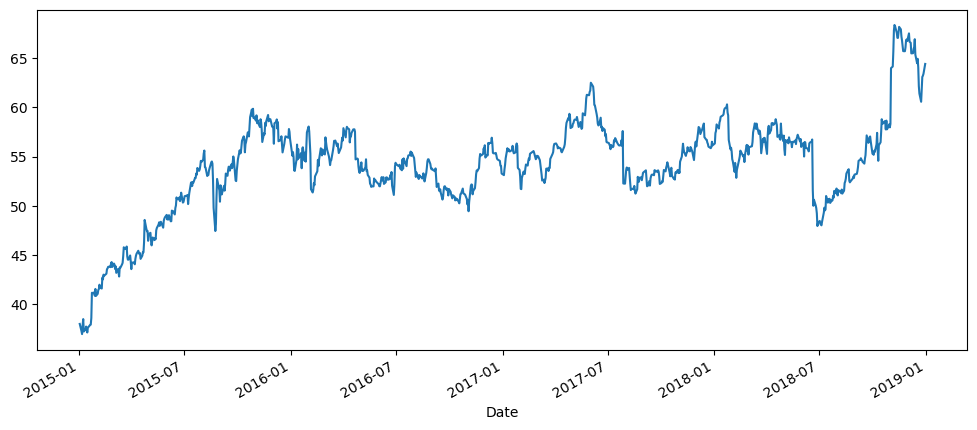

In [7]:
df["Close"].plot(figsize=(12,5)).autoscale(axis="x")

In [8]:
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<Axes: xlabel='Date'>

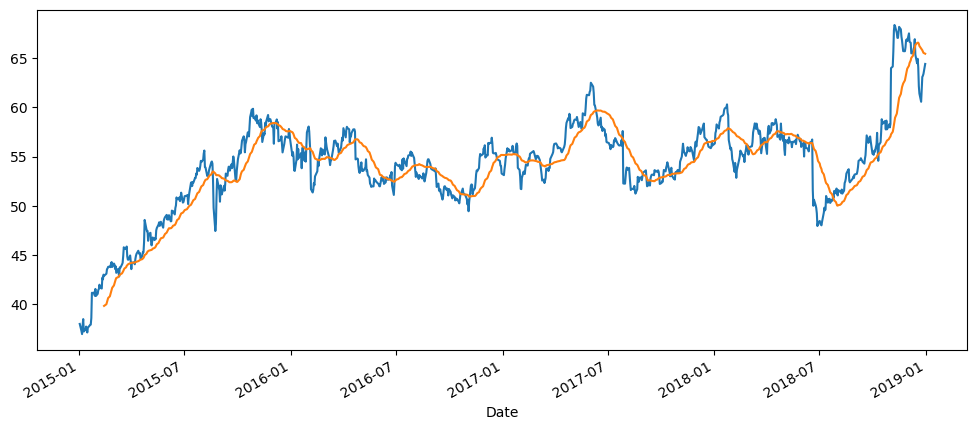

In [13]:
df["Close"].plot(figsize=(12,5)).autoscale(axis="x")
df.rolling(window=30).mean()['Close'].plot()

# Useful Methods

## apply() method

In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("tips.csv")
df.head()


,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [16]:
def last_four(num):
    return str(num)[-4:]


In [17]:
df["CC Number"][0]

3560325168603410

In [18]:
last_four(3560325168603410)

'3410'

In [19]:
df["last_four"] = df["CC Number"].apply(last_four)
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221


### Using .apply() with more complex functions

In [20]:
df["total_bill"].mean()

19.78594262295082

In [21]:
def yelp(price):
    if price < 10:
        return "$"
    elif price >=10 and price < 30:
        return "$$"
    else:
        return "$$$"

In [22]:
df["Expensive"] = df["total_bill"].apply(yelp)
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$


### apply with lambda

In [23]:
df["total_bill"].apply(lambda bill:bill * 0.18)


0      3.0582
1      1.8612
2      3.7818
3      4.2624
4      4.4262
        ...  
239    5.2254
240    4.8924
241    4.0806
242    3.2076
243    3.3804
Name: total_bill, Length: 244, dtype: float64

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$


In [30]:
def quality(total_bill,tip):
    if tip / total_bill > 0.25:
        return "Generous"
    else:
        return "Other" 

In [32]:
df["Tip Quality"] = df[["total_bill",'tip']].apply(lambda df:quality(df['total_bill'],df['tip']),axis=1)

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


In [34]:
import numpy as np

# np.vectorize(quality) 會產生一個函數 最終回傳一個向量

In [38]:
df["Tip Quality np"] = np.vectorize(quality)(df["total_bill"],df['tip'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality,Tip Quality np
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other,Other


In [39]:
df.describe()

,total_bill,tip,size,price_per_person,CC Number
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,1.978594e+01,8.902412e+00,3.070000e+00,1.334750e+01,1.779500e+01,2.412750e+01,5.081000e+01
tip,244.0,2.998279e+00,1.383638e+00,1.000000e+00,2.000000e+00,2.900000e+00,3.562500e+00,1.000000e+01
size,244.0,2.569672e+00,9.510998e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
price_per_person,244.0,7.888197e+00,2.914234e+00,2.880000e+00,5.800000e+00,7.255000e+00,9.390000e+00,2.027000e+01
CC Number,244.0,2.563496e+15,2.369340e+15,6.040679e+10,3.040731e+13,3.525318e+15,4.553675e+15,6.596454e+15


### sort_values

In [44]:
df.sort_values('tip',ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality,Tip Quality np
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Other,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other,Other
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other,Other


In [45]:
df.sort_values(['tip','size'])

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality,Tip Quality np
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous,Generous
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,$,Other,Other
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Other,Other
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other,Other
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other,Other


## df.corr() for correlation checks

[Wikipedia on Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence)

相關係數的含義：

1 表示完全正相關：當一個變量增加時，另一個變量也同樣比例增加

。
-1 表示完全負相關：當一個變量增加時，另一個變量同樣比例減

少。
0 表示沒有線性相關：兩個變量之間沒有線性

關聯。

In [47]:
number_df = df.select_dtypes(include=['number'])
coor_matrix =  number_df.corr()
coor_matrix

,total_bill,tip,size,price_per_person,CC Number
total_bill,1.000000,0.675734,0.598315,0.647554,0.104576
tip,0.675734,1.000000,0.489299,0.347405,0.110857
size,0.598315,0.489299,1.000000,-0.175359,-0.030239
price_per_person,0.647554,0.347405,-0.175359,1.000000,0.135240
CC Number,0.104576,0.110857,-0.030239,0.135240,1.000000


In [48]:
df[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [49]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality,Tip Quality np
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other,Other


In [51]:
df["total_bill"].max()

50.81

In [52]:
df["total_bill"].idxmax()

170

In [56]:
df["total_bill"].min()

3.07

In [54]:
df["total_bill"].idxmin()

67

In [57]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality,Tip Quality np
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other,Other


In [58]:
s = df['sex'].value_counts()
print(s)

sex
Male      157
Female     87
Name: count, dtype: int64


In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality,Tip Quality np
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other,Other


In [60]:
df["Tip Quality"].replace(to_replace="Other",value = "Ok")

0      Ok
1      Ok
2      Ok
3      Ok
4      Ok
       ..
239    Ok
240    Ok
241    Ok
242    Ok
243    Ok
Name: Tip Quality, Length: 244, dtype: object

In [61]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality,Tip Quality np
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other,Other


In [ ]:
uszie = df['size'].unique()
print(uszie)


[2 3 4 1 6 5]


6

In [65]:
df["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

### map

In [67]:
my_map = {"Dinner":"D","Lunch":"L"}
df["time"].map(my_map)


0      D
1      D
2      D
3      D
4      D
      ..
239    D
240    D
241    D
242    D
243    D
Name: time, Length: 244, dtype: object

In [68]:
my_map =  {"Dinner":0,"Lunch":1}
df["time"].map(my_map)

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int64

## enumerate

In [69]:
fruits = ["apple","banana","cherry"]
for i in range(len(fruits)):
    print(i,fruits[i])

0 apple
1 banana
2 cherry


In [73]:
fruits = ["apple","banana","cherry"]
mapDic = dict()
for index,fruit in enumerate(fruits):
    print(index,fruit)
    mapDic[fruit] = index
mapDic    

0 apple
1 banana
2 cherry


{'apple': 0, 'banana': 1, 'cherry': 2}

## Duplicates

In [74]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [75]:
simple_df= pd.DataFrame([1,2,2],['a','b','c'])
simple_df

,0
a,1
b,2
c,2


In [76]:
simple_df.duplicated()

a    False
b    False
c     True
dtype: bool

In [77]:
simple_df.drop_duplicates()

,0
a,1
b,2


# Missing Data

在 Pandas 中，為了表示缺失值，引入了一個新的值 pd.NA（單例）。之前，Pandas 使用多個值來表示缺失數

據：對於浮點數據使用 np.nan，對於對象類型數據使用 np.nan 或 None，對於類似日期時間的數據使用

pd.NaT。pd.NA 的目標是提供一個可以在不同數據類型之間一致使用的“缺失”指標。目前，pd.NA 被應用於可空

的整數和布爾數據類型以及新的字符串數據類型。

In [78]:
import numpy as np
import pandas as pd

np.nan

nan

In [81]:
pd.NA

<NA>

In [84]:
pd.NaT

NaT

In [82]:
np.nan == np.nan

False

In [90]:
np.nan in [np.nan]


True

In [91]:
np.nan is np.nan

True

In [93]:
pd.NA == pd.NA

<NA>

In [94]:
pd.NA is pd.NA

True

In [95]:
pd.NA in [pd.NA]

True